<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/facetone_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


128 149 187 132 157 197


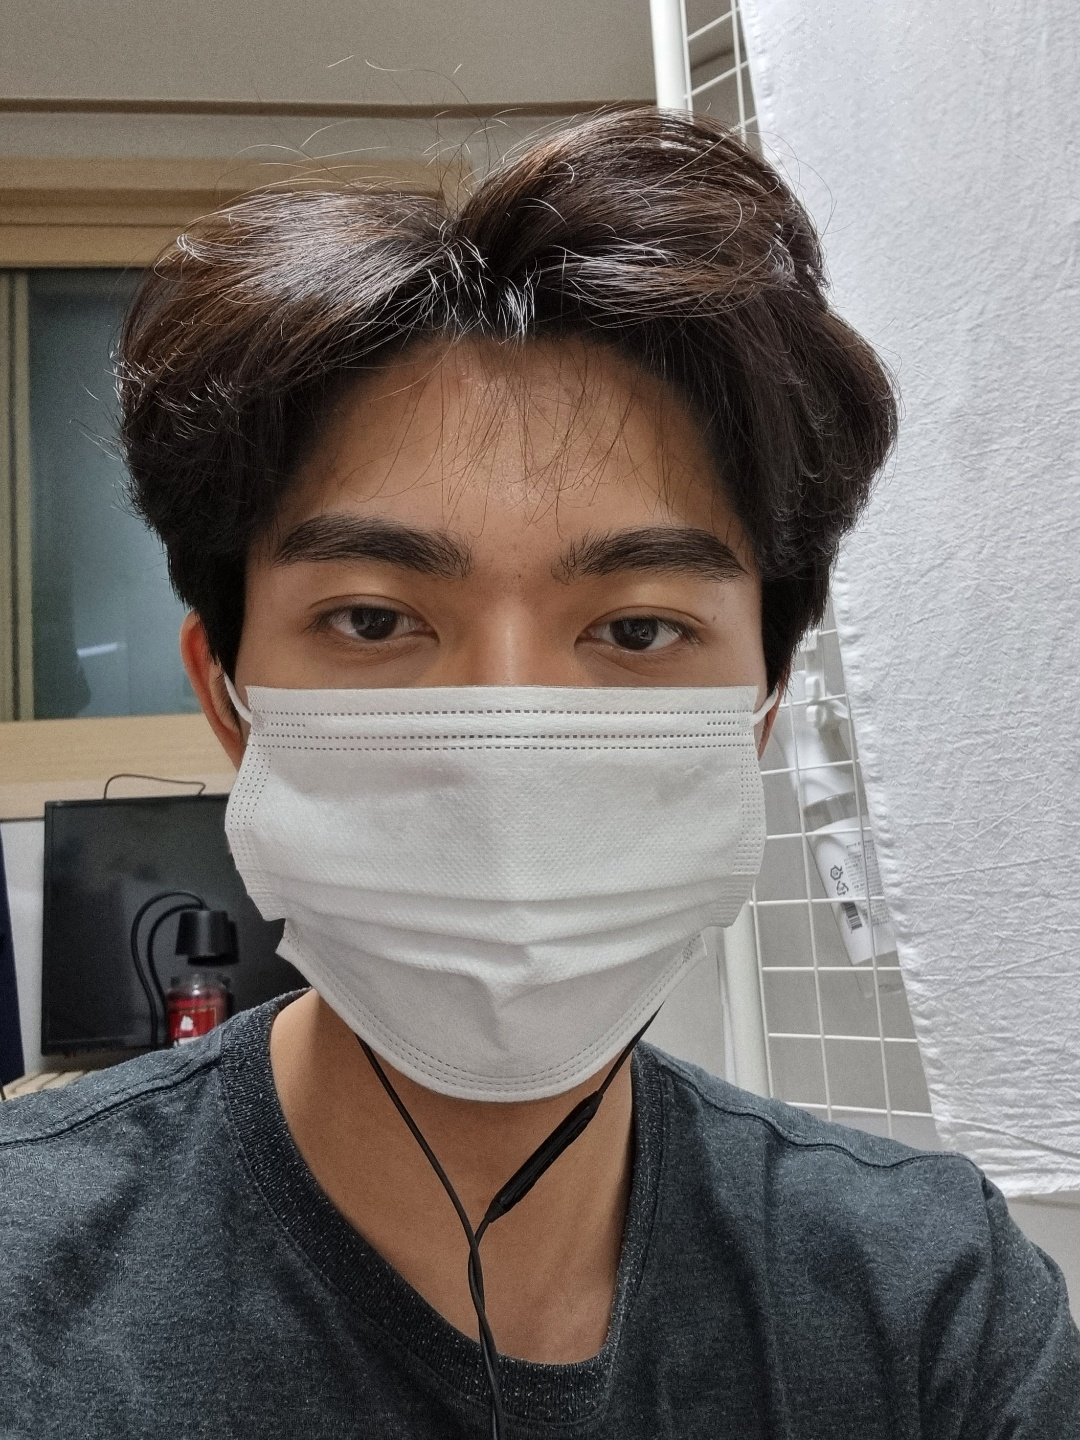

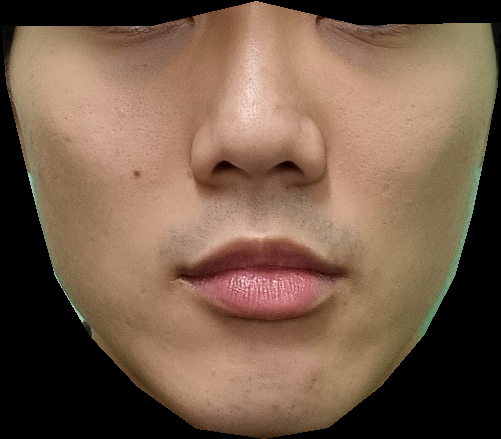

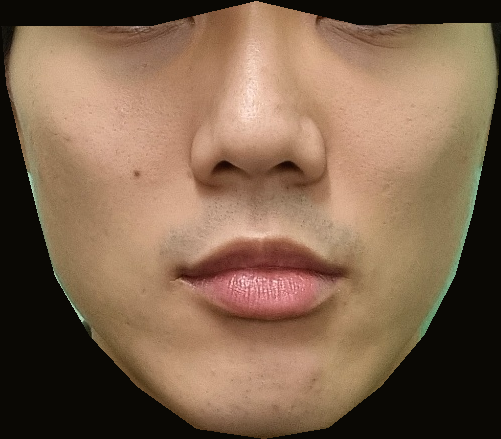

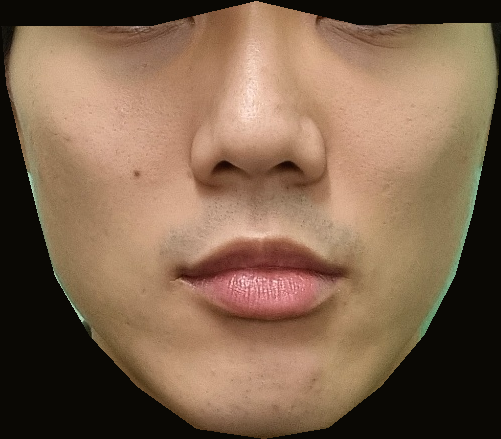

In [38]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os
import math


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/opencv/shape_predictor_68_face_landmarks.dat')

src = cv2.imread('/gdrive/MyDrive/result.png', cv2.IMREAD_COLOR)
img = cv2.imread('/gdrive/MyDrive/opencv/face5.jpg')
img2 = cv2.imread('/gdrive/MyDrive/opencv/face8.jpg', cv2.IMREAD_COLOR)

landmark1 = np.empty((68,2),int)
landmark2 = np.empty((68,2),int)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
rects = detector(gray,1)
rects2 = detector(gray2,1)
roi2 = rects2[0]
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
shape2 = predictor(gray2, roi2)
shape2 = face_utils.shape_to_np(shape2)
landmark1 = shape
landmark2 = shape2

b1,r1,g1 = img[landmark1[27][1],landmark1[27][0]]
b2,r2,g2 = img2[landmark2[27][1],landmark2[27][0]]
print(b1,r1,g1)
print(b2,r2,g2)
val1 = b2-b1
val2 = r2-r1
val3 = g2-g1

val = min(val1,val2,val3)

array = np.full(src.shape, (val, val, val), dtype = np.uint8)

if(val1<0):
  src = cv2.add(src,array)
else:
  src = cv2.subtract(src,array)


cv2_imshow(src)

